In [4]:
!pip install -r requirements.txt

d: python-dateutil>=2.7.3 in c:\users\alexr\appdata\local\programs\python\python39\lib\site-packages (from pandas->-r requirements.txt (line 1)) (2.8.1)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [6]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4225 non-null   object 
 1   customerID        4225 non-null   object 
 2   gender            4225 non-null   object 
 3   SeniorCitizen     4225 non-null   int64  
 4   Partner           4225 non-null   object 
 5   Dependents        4225 non-null   object 
 6   tenure            4225 non-null   int64  
 7   PhoneService      4225 non-null   object 
 8   MultipleLines     4225 non-null   object 
 9   InternetService   4225 non-null   object 
 10  OnlineSecurity    4225 non-null   object 
 11  OnlineBackup      4225 non-null   object 
 12  DeviceProtection  4225 non-null   object 
 13  TechSupport       4225 non-null   object 
 14  StreamingTV       4225 non-null   object 
 15  StreamingMovies   4225 non-null   object 
 16  Contract          4225 non-null   object 


In [8]:
train.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Yes,6776-TLWOI,Male,0,No,No,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,64.55
1,No,0036-IHMOT,Female,0,Yes,Yes,55,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),103.70,5656.75
2,No,2843-CQMEG,Male,0,No,No,24,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,49.70,1218.25
3,No,3247-MHJKM,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2
4,No,1194-BHJYC,Male,0,Yes,No,61,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,62.15,3778.85


In [9]:
#Incomincio la conversione dei valori delle colonne da Objects a Interi
colonneDaConvertire = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for x in colonneDaConvertire:
    train[x].replace(to_replace='Yes', value=1, inplace=True)
    train[x].replace(to_replace='No',  value=0, inplace=True)
    test[x].replace(to_replace='Yes',  value=1, inplace=True)
    test[x].replace(to_replace='No',  value=0, inplace=True)

    

train.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,6776-TLWOI,Male,0,0,0,3,1,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,19.85,64.55
1,0,0036-IHMOT,Female,0,1,1,55,1,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,1,Bank transfer (automatic),103.70,5656.75
2,0,2843-CQMEG,Male,0,0,0,24,1,No,DSL,...,Yes,No,No,No,No,Month-to-month,1,Mailed check,49.70,1218.25
3,0,3247-MHJKM,Male,0,0,0,1,1,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.20,20.2
4,0,1194-BHJYC,Male,0,1,0,61,0,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,Two year,1,Mailed check,62.15,3778.85


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4225 non-null   int64  
 1   customerID        4225 non-null   object 
 2   gender            4225 non-null   object 
 3   SeniorCitizen     4225 non-null   int64  
 4   Partner           4225 non-null   int64  
 5   Dependents        4225 non-null   int64  
 6   tenure            4225 non-null   int64  
 7   PhoneService      4225 non-null   int64  
 8   MultipleLines     4225 non-null   object 
 9   InternetService   4225 non-null   object 
 10  OnlineSecurity    4225 non-null   object 
 11  OnlineBackup      4225 non-null   object 
 12  DeviceProtection  4225 non-null   object 
 13  TechSupport       4225 non-null   object 
 14  StreamingTV       4225 non-null   object 
 15  StreamingMovies   4225 non-null   object 
 16  Contract          4225 non-null   object 


In [11]:
train.isnull().sum(axis = 0)

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [12]:
train['TotalCharges'] = train['TotalCharges'].replace(" ", 0).astype('float64')
test['TotalCharges'] = test['TotalCharges'].replace(" ", 0).astype('float64')

In [13]:
train.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,6776-TLWOI,Male,0,0,0,3,1,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,19.85,64.55
1,0,0036-IHMOT,Female,0,1,1,55,1,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,1,Bank transfer (automatic),103.70,5656.75
2,0,2843-CQMEG,Male,0,0,0,24,1,No,DSL,...,Yes,No,No,No,No,Month-to-month,1,Mailed check,49.70,1218.25
3,0,3247-MHJKM,Male,0,0,0,1,1,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.20,20.20
4,0,1194-BHJYC,Male,0,1,0,61,0,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,Two year,1,Mailed check,62.15,3778.85


In [14]:
#Codifica dei valori degli attributi customerID, Contract e PaymentMethod con valori interi
Encoder = LabelEncoder() 
train["customerID"] = Encoder.fit_transform(train["customerID"])
test["customerID"] = Encoder.fit_transform(test["customerID"])

train["Contract"] = Encoder.fit_transform(train["Contract"])
test["Contract"] = Encoder.fit_transform(test["Contract"])

train["PaymentMethod"] = Encoder.fit_transform(train["PaymentMethod"])
test["PaymentMethod"] = Encoder.fit_transform(test["PaymentMethod"])

In [15]:
print(train.groupby("MultipleLines").size())

MultipleLines
No                  2032
No phone service     402
Yes                 1791
dtype: int64


In [16]:
mapping={'No': 0, 'No phone service': 2, 'Yes' : 1}
train['MultipleLines'] = train['MultipleLines'].map(mapping)
test['MultipleLines'] = test['MultipleLines'].map(mapping)

In [17]:
print(train.groupby("gender").size())

gender
Female    2052
Male      2173
dtype: int64


In [18]:
mapping={'Female': 1, 'Male': 0}
train['gender'] = train['gender'].map(mapping)
test['gender'] = test['gender'].map(mapping)

In [19]:
#Fondo insieme le colonne inerenti allo streaming, ovvero StreamingTv e Streaming Services in un unica colonna StreamingServices
list_streaming_services1 = []
for x in range(len(train['StreamingTV'])):
    if ((train['StreamingTV'][x] == 'No') and (train['StreamingMovies'][x] == 'No')):
        list_streaming_services1.append('No')
    else:
        list_streaming_services1.append('Yes')

list_streaming_services2 = []
for x in range(len(test['StreamingTV'])):
    if ((test['StreamingTV'][x] == 'No') and (test['StreamingMovies'][x] == 'No')):
        list_streaming_services2.append('No')
    else:
        list_streaming_services2.append('Yes')

train['StreamingServices'] = list_streaming_services1

test['StreamingServices'] = list_streaming_services2

In [20]:
train.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,StreamingServices
0,1,2937,0,0,0,0,3,1,0,No,...,No internet service,No internet service,No internet service,No internet service,0,0,3,19.85,64.55,Yes
1,0,15,1,0,1,1,55,1,0,Fiber optic,...,Yes,Yes,Yes,Yes,1,1,0,103.70,5656.75,Yes
2,0,1187,0,0,0,0,24,1,0,DSL,...,No,No,No,No,0,1,3,49.70,1218.25,No
3,0,1378,0,0,0,0,1,1,0,No,...,No internet service,No internet service,No internet service,No internet service,0,0,3,20.20,20.20,Yes
4,0,501,0,0,1,0,61,0,2,DSL,...,Yes,Yes,Yes,Yes,2,1,3,62.15,3778.85,Yes


In [21]:
train=train.drop(["StreamingTV", "StreamingMovies"], axis=1)
test=test.drop(["StreamingTV", "StreamingMovies"], axis=1)

In [22]:
colonneDaConvertire = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingServices']

for x in colonneDaConvertire:
    train[x].replace(to_replace='Yes', value=1, inplace=True)
    train[x].replace(to_replace='No',  value=0, inplace=True)
    train[x].replace(to_replace='No internet service', value=2, inplace=True)
    test[x].replace(to_replace='Yes', value=1, inplace=True)
    test[x].replace(to_replace='No',  value=0, inplace=True)
    test[x].replace(to_replace='No internet service', value=2, inplace=True)

In [23]:
print(train.groupby("InternetService").size())

InternetService
DSL            1459
Fiber optic    1856
No              910
dtype: int64


In [24]:
mapping={'DSL': 0, 'Fiber optic': 1, 'No' : 2}
train['InternetService'] = train['InternetService'].map(mapping)
test['InternetService'] = test['InternetService'].map(mapping)

<AxesSubplot:xlabel='Churn', ylabel='gender'>

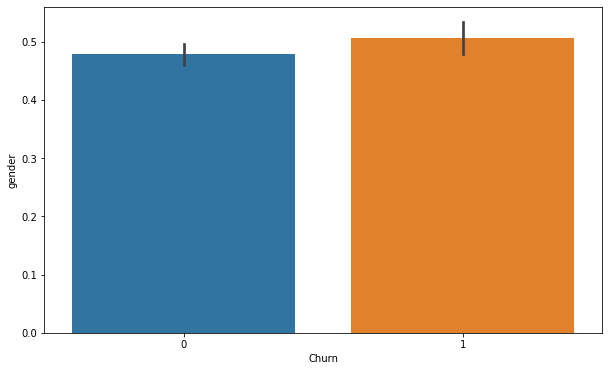

In [25]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Churn', y = 'gender', data = train)

<AxesSubplot:xlabel='Churn', ylabel='customerID'>

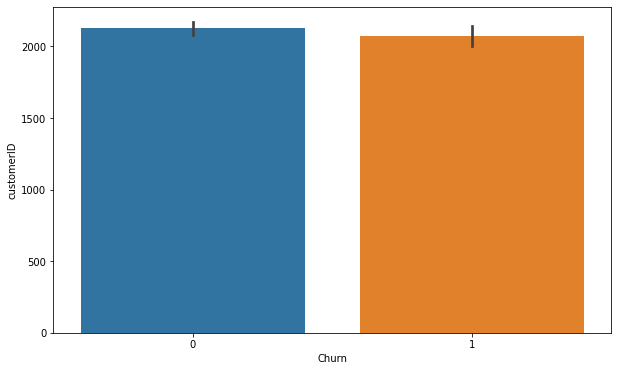

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Churn', y = 'customerID', data = train)

In [27]:
#y_train = train["Churn"]
#x_train = train.drop(['Churn', 'gender','customerID'], axis=1)

#y_test = train["Churn"]
#x_test = train.drop(['Churn', 'gender','customerID'], axis=1)

y_train = train["Churn"].values #valori di class
X_train = train.drop(['Churn','gender','customerID'], axis=1).values #tutti i dati eccetto la colonna "class"

y_test = test["Churn"].values #valori di class
X_test = test.drop(['Churn','gender','customerID'], axis=1).values

In [28]:
train.dtypes

Churn                  int64
customerID             int32
gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService        int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
Contract               int32
PaperlessBilling       int64
PaymentMethod          int32
MonthlyCharges       float64
TotalCharges         float64
StreamingServices      int64
dtype: object

In [29]:
logic = LogisticRegression(random_state=0, max_iter=1000)
logic.fit(X_train, y_train)
y_pred = logic.predict(X_test)

MYaccurancy=round(accuracy_score(y_test, y_pred) * 100,2)
print(MYaccurancy)

79.7


In [30]:
test.sample(10)

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,StreamingServices
1377,0,171,0,0,0,0,52,1,0,2,2,2,2,2,2,0,3,19.65,1025.05,1
912,0,55,0,0,0,0,9,0,2,0,1,1,1,0,1,0,3,39.55,373.00,0
1273,0,716,1,0,0,0,59,1,1,2,2,2,2,2,2,0,2,24.45,1493.10,1
618,0,1092,1,0,0,0,15,1,1,0,0,0,0,0,0,1,3,48.80,720.10,0
1308,1,138,1,0,0,0,41,1,0,1,0,0,0,0,0,0,0,70.25,2868.05,0
492,0,1298,0,0,0,0,37,1,1,0,1,1,1,1,1,0,2,67.45,2443.30,0
1399,0,1020,0,0,1,1,13,0,2,0,1,1,0,1,2,0,3,40.55,590.35,0
255,1,1396,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,74.30,74.30,0
782,0,599,1,0,0,1,5,1,0,0,0,0,0,1,0,1,3,51.00,286.80,0
1070,0,418,1,0,0,0,67,1,0,0,1,1,0,1,1,0,1,60.50,3870.00,0


In [33]:
logic = LogisticRegression(random_state=0, max_iter=1000)
logic.fit(X_train, y_train)
print("Accuracy on test set: {:.3f}".format(logic.score(X_test, y_test)))

Accuracy on test set: 0.797
